<a href="https://colab.research.google.com/github/shivansh2310/WQU-Files/blob/main/Group_4426_ETF_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPY ETF Analysis

## ETF Comparision With BenchMark Index

In [1]:
!pip install yfinance


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Tickers
spy_ticker = "SPY"
gspc_ticker = "^GSPC"

In [4]:
#Historic Data Download
spy_data = yf.download(spy_ticker, start="2018-01-01", end="2023-01-01")
gspc_data = yf.download(gspc_ticker, start="2018-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Extracted adjusted closing prices
spy_adj_close = spy_data['Adj Close']
gspc_adj_close = gspc_data['Adj Close']

In [6]:
# Calculating percentage returns
spy_returns = spy_adj_close.pct_change().dropna()
gspc_returns = gspc_adj_close.pct_change().dropna()

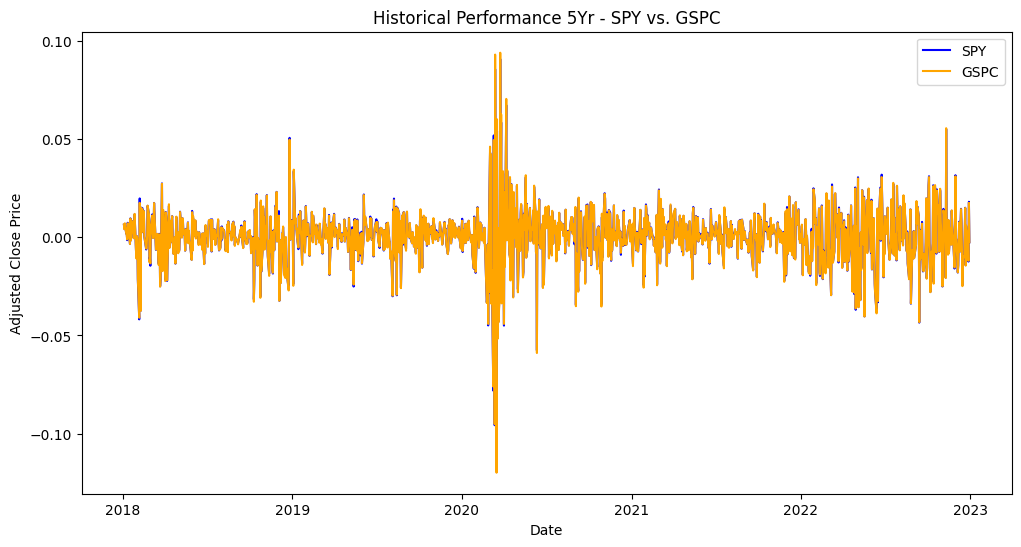

In [30]:
# Historical Performance for 5 Years
# Plotting historical performance based on percentage return
plt.figure(figsize=(12, 6))
plt.plot(spy_returns, label="SPY", color='blue')
plt.plot(gspc_returns, label="GSPC", color='orange')
plt.title("Historical Performance 5Yr - SPY vs. GSPC")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

In [8]:
# Historical Performance for 1 Years
spy_adj_close_last_year = spy_data['Adj Close'].loc['2022-01-01':'2023-01-01']
gspc_adj_close_last_year = gspc_data['Adj Close'].loc['2022-01-01':'2023-01-01']

In [9]:
# Calculating percentage returns
spy_returns_1yr = spy_adj_close_last_year.pct_change().dropna()
gspc_returns_1yr = gspc_adj_close_last_year.pct_change().dropna()

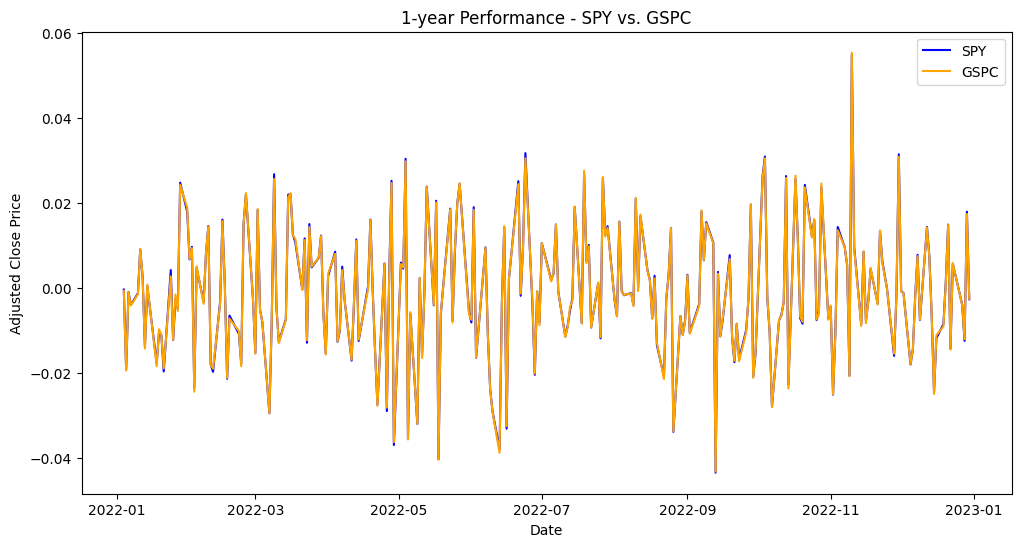

In [10]:
# Plotting historical performance based on percentage return
plt.figure(figsize=(12, 6))
plt.plot(spy_returns_1yr, label="SPY", color='blue')
plt.plot(gspc_returns_1yr, label="GSPC", color='orange')
plt.title("1-year Performance - SPY vs. GSPC")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.show()

## Realtive returns


In [11]:
# Realtive return calculation
relative_returns = spy_returns_1yr - gspc_returns_1yr

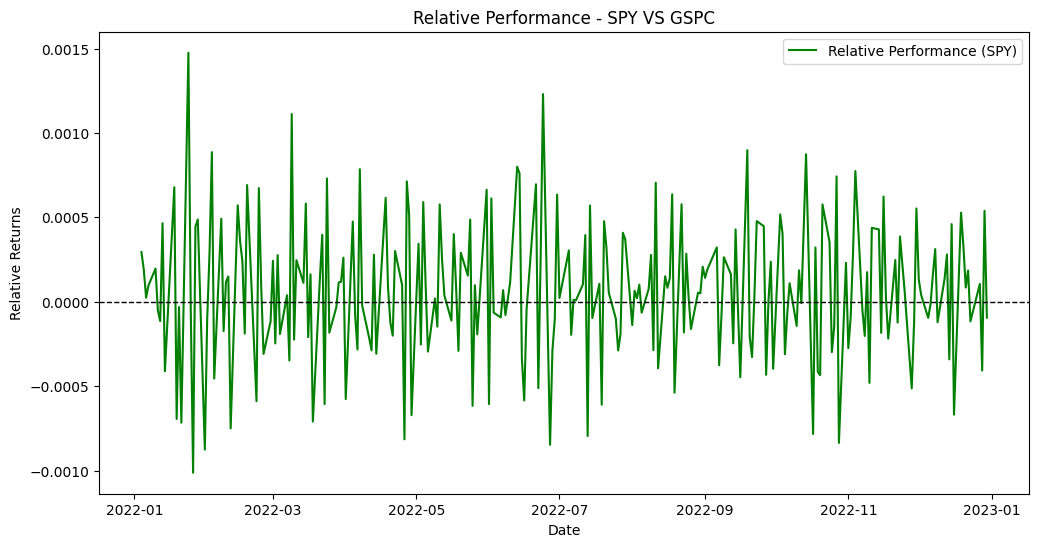

In [37]:
# Plotting relative performance
plt.figure(figsize=(12, 6))
plt.plot(relative_returns, label="Relative Performance (SPY)", color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Adding a horizontal line at zero for reference
plt.title("Relative Performance - SPY VS GSPC")
plt.xlabel("Date")
plt.ylabel("Relative Returns")
plt.legend()
plt.show()

## Correlation

In [40]:
# Calculating correlation bewteen SPY & GSPC
correlation = spy_returns.corr(gspc_returns_1yr)
print(f"Correlation between SPY and GSPC: {correlation:.4f}")

Correlation between SPY and GSPC: 0.9996


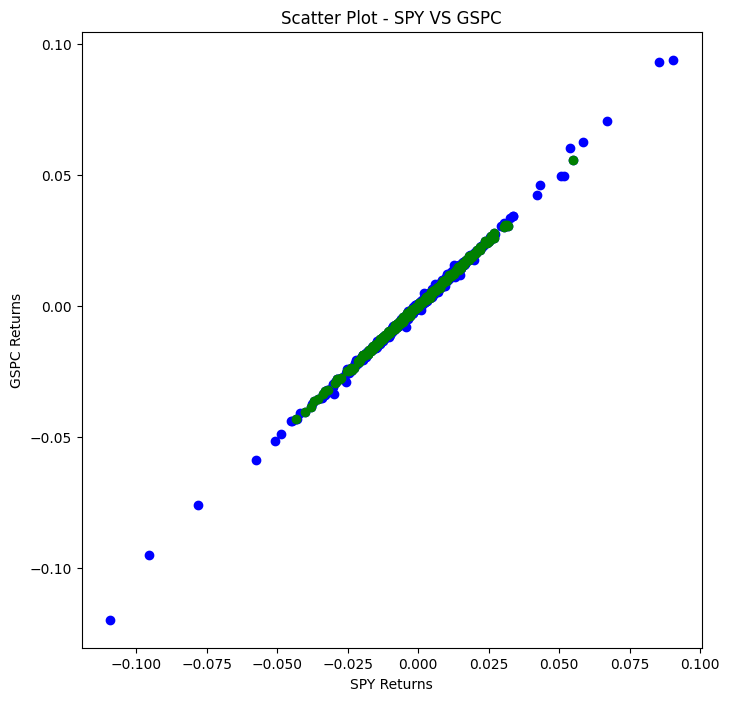

In [39]:
# Plotting scatter plot of Correlation
plt.figure(figsize=(8, 8))
plt.scatter(spy_returns, gspc_returns, color='blue')
plt.scatter(spy_returns_1yr, gspc_returns_1yr, color='Green')
plt.title("Scatter Plot - SPY VS GSPC")
plt.xlabel("SPY Returns")
plt.ylabel("GSPC Returns")
plt.show()

## Return Different Time-periods

In [41]:
# Different time-perios returns
spy_adj_close_1_year = spy_data['Adj Close'].loc['2022-01-01':'2023-01-01']
spy_adj_close_3_year = spy_data['Adj Close'].loc['2020-01-01':'2023-01-01']
spy_adj_close_5_year = spy_data['Adj Close'].loc['2018-01-01':'2023-01-01']

In [16]:
# percentage return calculation
spy_returns_1yr_pct = spy_adj_close_1_year.pct_change().dropna()
spy_returns_3yr_pct = spy_adj_close_3_year.pct_change().dropna()
spy_returns_5yr_pct = spy_adj_close_5_year.pct_change().dropna()

In [17]:
# Overall percentage return calculation
overall_return_1yr = (spy_returns_1yr_pct + 1).prod() - 1
overall_return_3yr = (spy_returns_3yr_pct + 1).prod() - 1
overall_return_5yr = (spy_returns_5yr_pct + 1).prod() - 1

# results
print(f"Overall 1-Year Percentage Return: {overall_return_1yr * 100:.2f}%")
print(f"Overall 3-Year Percentage Return: {overall_return_3yr * 100:.2f}%")
print(f"Overall 5-Year Percentage Return: {overall_return_5yr * 100:.2f}%")

Overall 1-Year Percentage Return: -18.65%
Overall 3-Year Percentage Return: 23.49%
Overall 5-Year Percentage Return: 54.98%


## Sharpe Ratio & Volatitlity

In [18]:
# Calculating returns for different time periods
returns_1_year = spy_adj_close.pct_change(252).dropna()
returns_3_years = spy_adj_close.pct_change(252 * 3).dropna()
returns_5_years = spy_adj_close.pct_change(252 * 5).dropna()

In [19]:
# Risk-Adjusted Returns
# Calculating annualized mean and standard deviation
annualized_mean_spy = returns_1_year.mean() * 252
annualized_std_spy = returns_1_year.std() * np.sqrt(252)
annualized_mean_gspc = gspc_returns.mean() * 252
annualized_std_gspc = gspc_returns.std() * np.sqrt(252)

In [22]:
# Calculating Sharpe ratio
sharpe_ratio_spy = annualized_mean_spy / annualized_std_spy
sharpe_ratio_gspc = annualized_mean_gspc / annualized_std_gspc

print("Risk-Adjusted Returns:")
print(f"SPY Sharpe Ratio: {sharpe_ratio_spy:.4f}")
print(f"GSPC Sharpe Ratio: {sharpe_ratio_gspc:.4f}")



Risk-Adjusted Returns:
SPY Sharpe Ratio: 12.4423
GSPC Sharpe Ratio: 0.4339


In [23]:
# Volatility
volatility_spy = annualized_std_spy
volatility_gspc = annualized_std_gspc

print("\nVolatility:")
print(f"SPY Volatility: {volatility_spy:.4f}")
print(f"GSPC Volatility: {volatility_gspc:.4f}")


Volatility:
SPY Volatility: 2.7769
GSPC Volatility: 0.2187


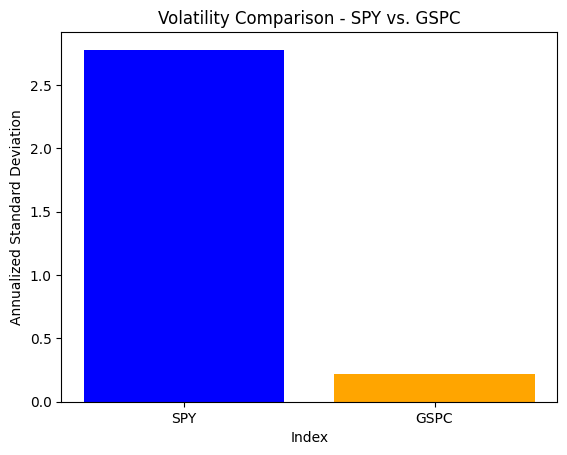

In [24]:
# Plotting volatility comparison
labels = ['SPY', 'GSPC']
volatilities = [annualized_std_spy, annualized_std_gspc]

plt.bar(labels, volatilities, color=['blue', 'orange'])
plt.title("Volatility Comparison - SPY vs. GSPC")
plt.xlabel("Index")
plt.ylabel("Annualized Standard Deviation")
plt.show()

## Liquidity Analysis


In [25]:
# Volume data
spy_volume = spy_data['Volume']
spy_bid_ask_spread = spy_data['High'] - spy_data['Low']

In [26]:
# Calculating average daily trading volume
average_daily_volume = spy_volume.mean()

In [27]:
# Calculating average bid-ask spread
average_bid_ask_spread = spy_bid_ask_spread.mean()

In [28]:
# Printing average daily volume and bid-ask spread
print(f"Average Daily Volume: {average_daily_volume:.2f}")
print(f"Average Bid-Ask Spread: {average_bid_ask_spread:.4f}")

Average Daily Volume: 87220776.17
Average Bid-Ask Spread: 4.5951


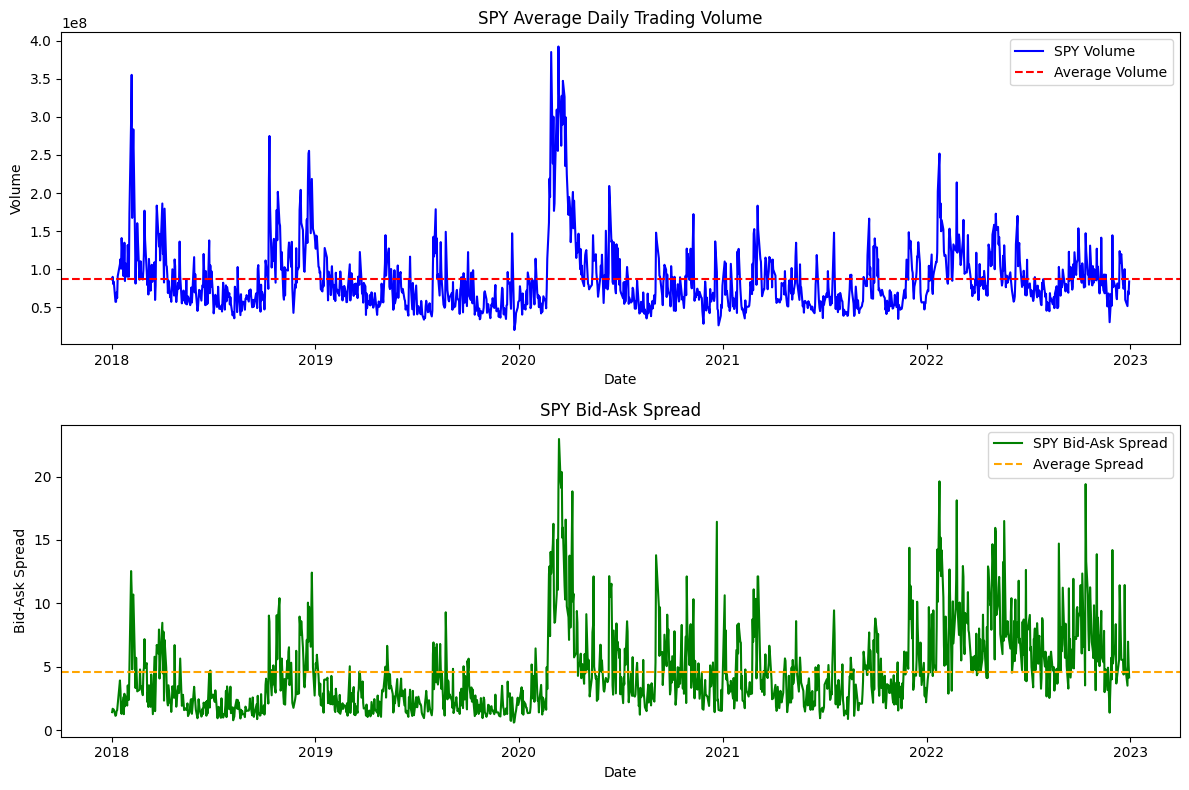

In [29]:
# Plotting average daily volume and bid-ask spread
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting average daily volume
ax1.plot(spy_volume, label="SPY Volume", color='blue')
ax1.axhline(average_daily_volume, color='red', linestyle='--', label='Average Volume')
ax1.set_title("SPY Average Daily Trading Volume")
ax1.set_xlabel("Date")
ax1.set_ylabel("Volume")
ax1.legend()

# Plotting bid-ask spread
ax2.plot(spy_bid_ask_spread, label="SPY Bid-Ask Spread", color='green')
ax2.axhline(average_bid_ask_spread, color='orange', linestyle='--', label='Average Spread')
ax2.set_title("SPY Bid-Ask Spread")
ax2.set_xlabel("Date")
ax2.set_ylabel("Bid-Ask Spread")
ax2.legend()

plt.tight_layout()
plt.show()

